In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.2/757.2 kB 9.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [11]:

# Disable warnings in the notebook to maintain clean output cells
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import os
import shutil
import numpy as np
import pandas as pdw
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import yaml
from PIL import Image
from ultralytics import YOLO
from IPython.display import Video

In [12]:

dataset_path = '/content/drive/MyDrive/Dataset/CarData'


yaml_file_path = os.path.join(dataset_path, 'data.yaml')

with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.load(file, Loader=yaml.FullLoader)
    print(yaml.dump(yaml_content, default_flow_style=False))

names:
- Vehicle
nc: 1
roboflow:
  license: CC BY 4.0
  project: vehicle_detection_yolov8
  url: https://universe.roboflow.com/farzad/vehicle_detection_yolov8/dataset/3
  version: 3
  workspace: farzad
train: /content/drive/MyDrive/Dataset/CarData/train/images
val: /content/drive/MyDrive/Dataset/CarData/test/images



In [13]:
import torch
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(f'Using device: {device}')

Using device: cuda


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8m.pt')


results = model.train(
    data=yaml_file_path,     # Path to the dataset configuration file
    epochs=100,              # Number of epochs to train for
    imgsz=640,               # Size of input images as integer
    device=0,                # Device to run on, i.e. cuda device=0
    patience=50,             # Epochs to wait for no observable improvement for early stopping of training
    batch=32,                # Number of images per batch
    optimizer='auto',        # Optimizer to use, choices=[SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto]
    lr0=0.0001,              # Initial learning rate
    lrf=0.1,                 # Final learning rate (lr0 * lrf)
    dropout=0.1,             # Use dropout regularization
    seed=0                   # Random seed for reproducibility
)

In [15]:

val_dataset_path = '/content/drive/MyDrive/Dataset/CarData/data.yaml'


results = model.val(data=val_dataset_path)

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 13059 gradients, 78.7 GFLOPs


val: Scanning /content/drive/MyDrive/Dataset/CarData/test/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:12<00:00,  2.02s/it]


                   all         90        937      0.935      0.933      0.973      0.735
Speed: 1.2ms preprocess, 49.8ms inference, 0.0ms loss, 21.8ms postprocess per image
Results saved to runs/detect/val3


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"


image 1/1 /content/drive/MyDrive/Dataset/CarData/test/images/8_mp4-0_jpg.rf.3b2c1cfee1946594ca79d413e945d30a.jpg: 640x640 5 Vehicles, 39.1ms
Speed: 2.0ms preprocess, 39.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset/CarData/test/images/5_mp4-27_jpg.rf.30a8975089fb66bc245019de9d868801.jpg: 640x640 19 Vehicles, 37.1ms
Speed: 1.6ms preprocess, 37.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset/CarData/test/images/8_mp4-12_jpg.rf.dcbef9dfc2cf3b8eecf139c256caa179.jpg: 640x640 14 Vehicles, 37.1ms
Speed: 1.6ms preprocess, 37.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset/CarData/test/images/10_mp4-13_jpg.rf.aff71e875ee297d3086b715b7d6aaf26.jpg: 640x640 25 Vehicles, 37.1ms
Speed: 1.5ms preprocess, 37.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dat

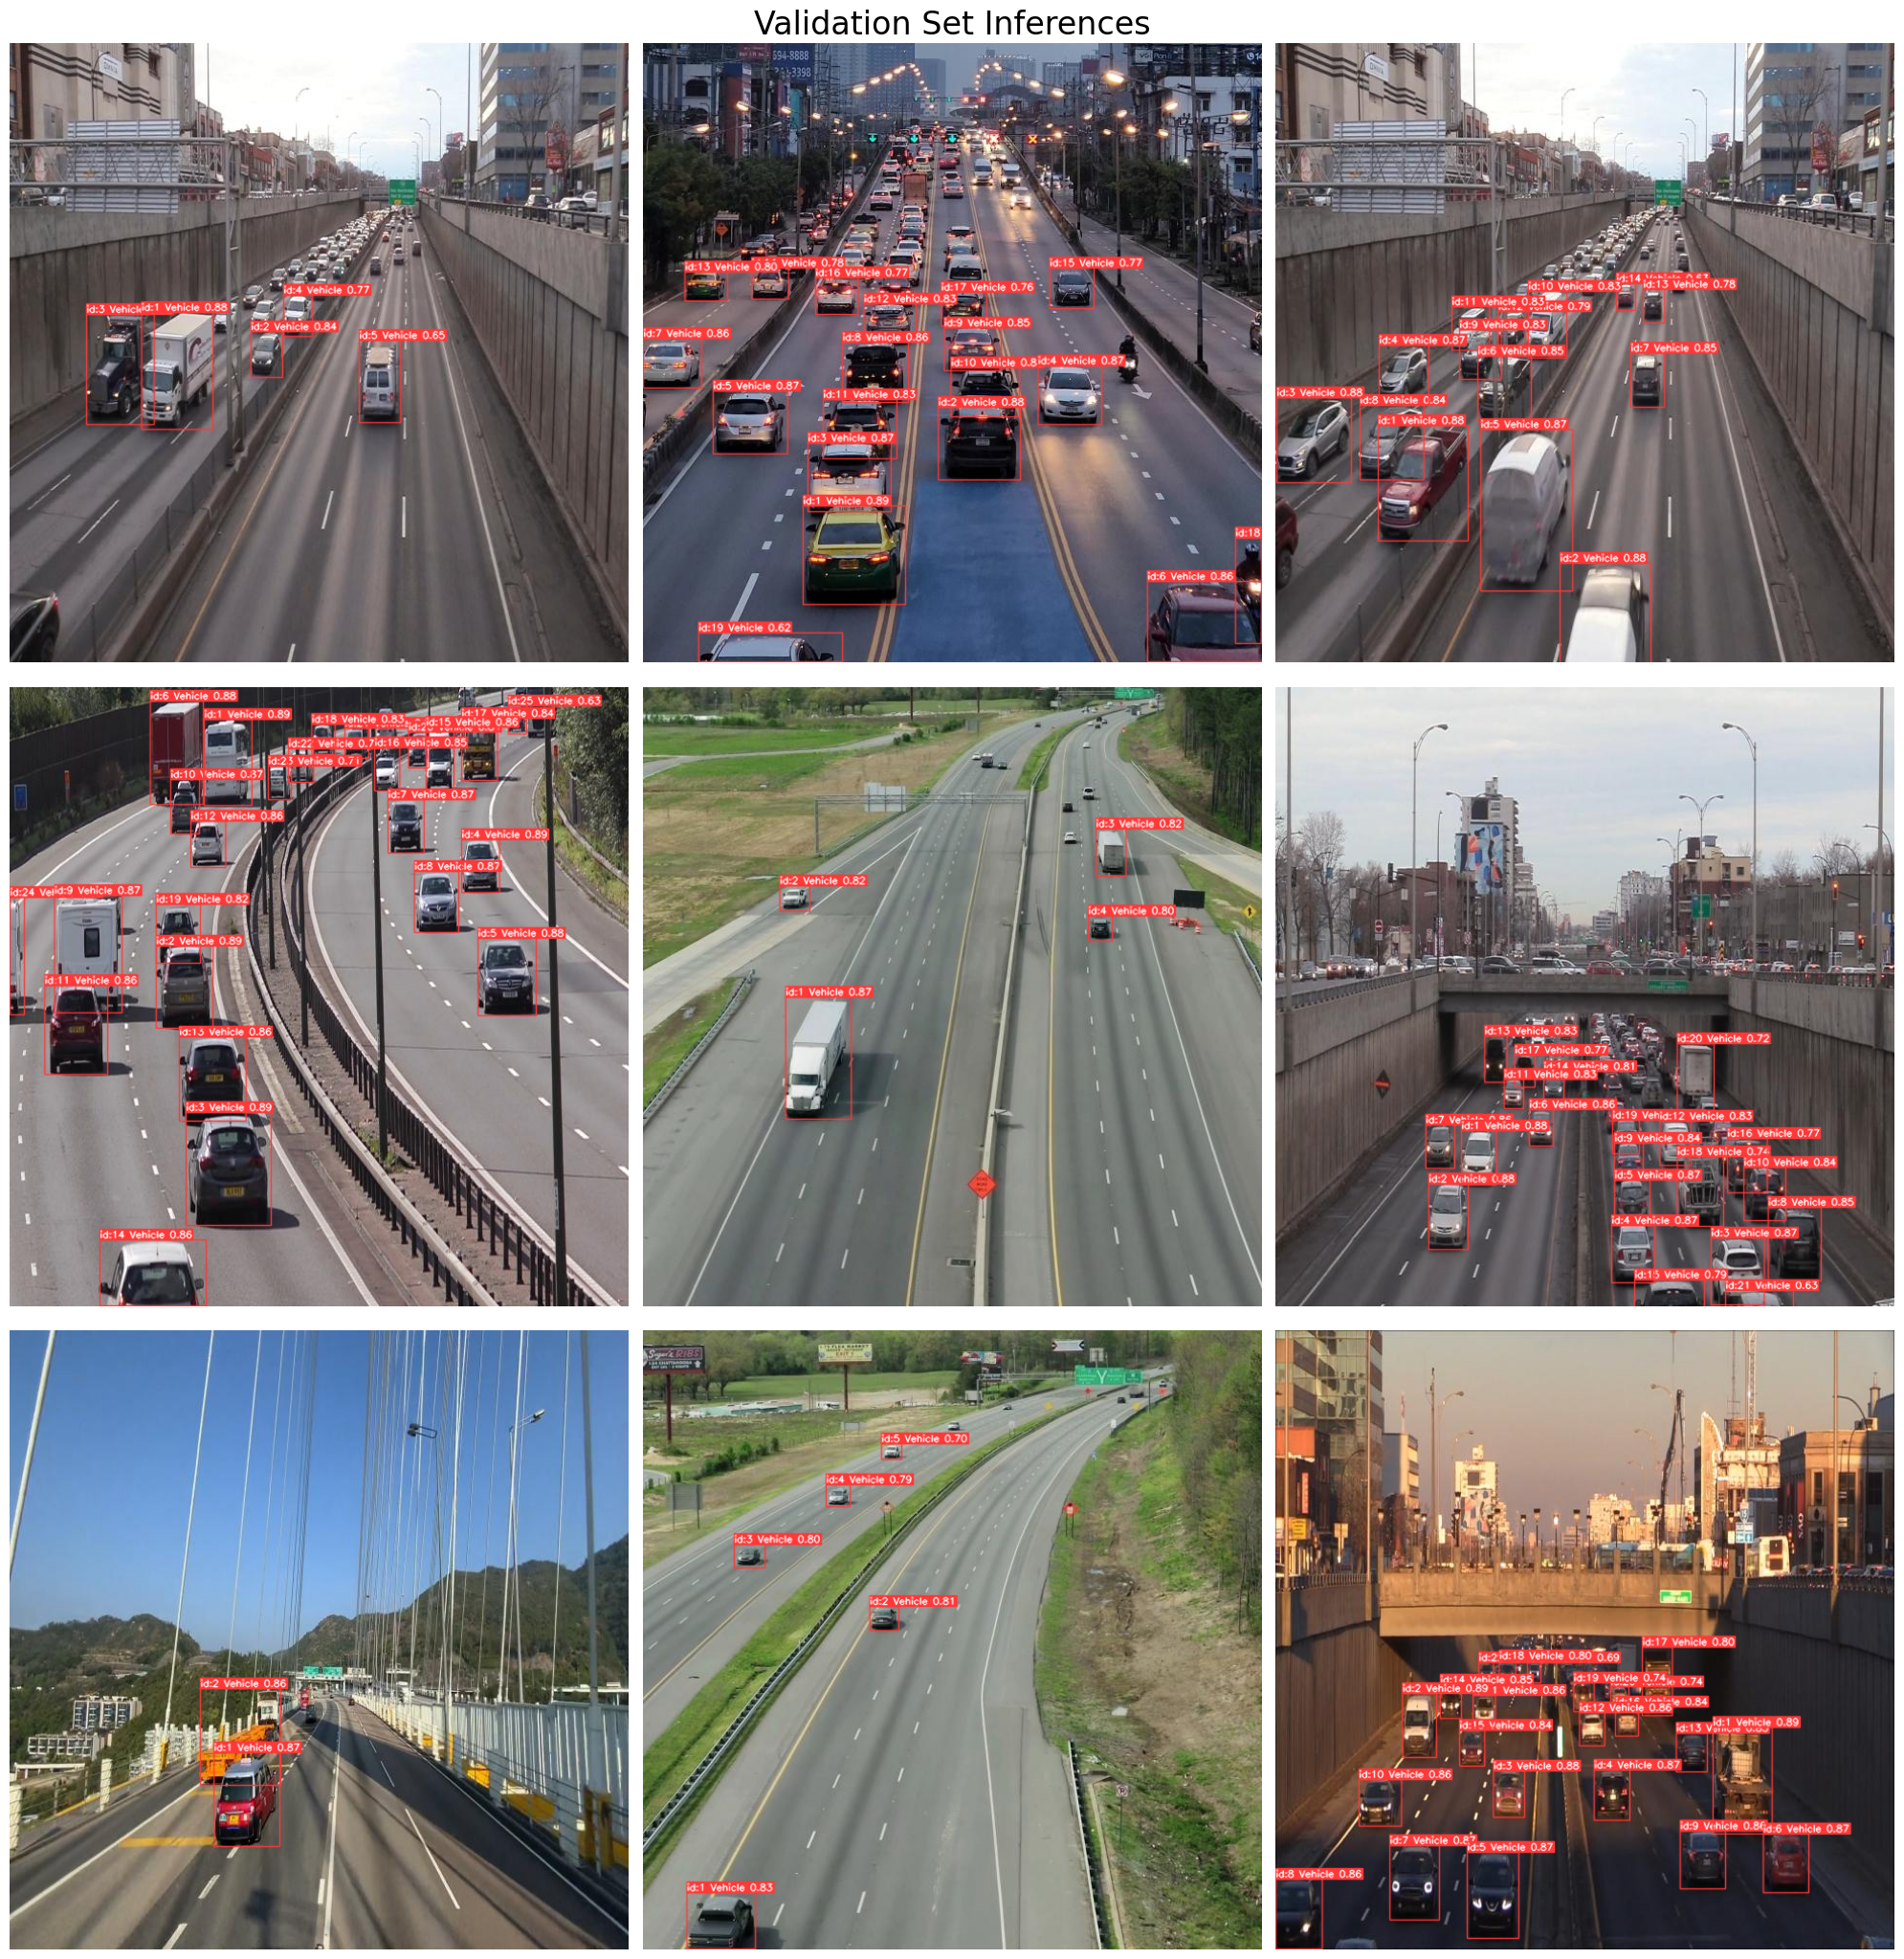

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

valid_images_path = os.path.join(dataset_path, 'test', 'images')

image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

num_images = len(image_files)
selected_images = [image_files[i] for i in range(0, num_images, num_images // 9)]

fig, axes = plt.subplots(3, 3, figsize=(20, 21))
fig.suptitle('Validation Set Inferences', fontsize=24)

for i, ax in enumerate(axes.flatten()):
    image_path = os.path.join(valid_images_path, selected_images[i])
    results = model.predict(source=image_path, imgsz=640, conf=0.5)
    annotated_image = results[0].plot(line_width=1)
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    ax.imshow(annotated_image_rgb)
    ax.axis('off')


plt.tight_layout()
plt.show()

In [ ]:
!pip install supervision

In [ ]:
import cv2
from collections import defaultdict
import supervision as sv
from ultralytics import YOLO

model = YOLO("/content/runs/detect/train/weights/best.pt")

cap = cv2.VideoCapture("/content/drive/MyDrive/Dataset/CarData/testCar2.mp4")

START = sv.Point(10, 547)
END = sv.Point(1562, 535)

track_history = defaultdict(lambda: [])
crossed_objects = {}

results = model.track(source="/content/drive/MyDrive/Dataset/CarData/testCar2.mp4", conf=0.3, iou=0.5, save=True)

video_info = sv.VideoInfo.from_video_path("/content/drive/MyDrive/Dataset/CarData/testCar2.mp4")
with sv.VideoSink("output_single_line.mp4", video_info) as sink:
    for result in results:
        frame = result.orig_img
        boxes = result.boxes.xyxy.cpu().numpy()
        track_ids = result.boxes.id.cpu().numpy() if result.boxes.id is not None else []

        annotated_frame = result.plot()

        for box, track_id in zip(boxes, track_ids):
            x1, y1, x2, y2 = box
            x, y = (x1 + x2) / 2, (y1 + y2) / 2
            track = track_history[track_id]
            track.append((float(x), float(y)))
            if len(track) > 30:
                track.pop(0)

            if START.x < x < END.x and abs(y - START.y) < 5:
                if track_id not in crossed_objects:
                    crossed_objects[track_id] = True

                cv2.rectangle(annotated_frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

        cv2.line(annotated_frame, (START.x, START.y), (END.x, END.y), (0, 255, 0), 2)

        count_text = f"Objects crossed: {len(crossed_objects)}"
        cv2.putText(annotated_frame, count_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        sink.write_frame(annotated_frame)

cap.release()
